# t-SNE

In [1]:
%reset -f
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import sys
sys.path.insert(0,'..')
from wavhandler import *
import numpy as np
import sys
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from utils_train import *
from configs import *
import matplotlib.pyplot as plt
import seaborn as sns
import os
seed = 42
np.random.seed(seed=seed)

In [2]:
splitting = 'random'
cust = 'na' # 4
data_setting = 'raw'
model_setting = 'dl4tsc_inc'
# layer_name = 'dense'#'global_average_pooling1d'#'dense'#

assert splitting in ['random','randomcv','custom'], "Wrong splitting method given."
assert data_setting in ['raw','stft','psd_dB'], "Wrong data settting given."
assert model_setting in ['wavenet','lstm','gru','conv1d','conv1d_psd',
                        'DenseNet121','DenseNet169','DenseNet201',
                        'InceptionResNetV2','VGG16','VGG19',
                        'dl4tsc_fcn','dl4tsc_res', 'tsc_res_baseline',
                        'tsc_fcn_baseline', 'conv1d_baseline', 'dl4tsc_inc'], "Wrong model setting given"

data = Dataset('Wingbeats')
print(data.target_classes)

print(f'SPLITTING DATA {splitting}')
X_train, X_val, X_test, y_train, y_val, y_test, le = mosquito_data_split(splitting=splitting, dataset=data, return_label_encoder=True)
if splitting == 'custom':
    X_train = X_train[cust]
    X_val = X_val[cust]
    y_train = y_train[cust]
    y_val = y_val[cust]

from configs import ModelConfiguration, TrainConfiguration

traincf = TrainConfiguration(dataset=data, 
                             setting=data_setting,
                             batch_size=64,
                             model_name=f'../temp_data/{splitting}_{data_setting}_{model_setting}')

config = ModelConfiguration(model_setting=model_setting, 
                            data_setting=data_setting, 
                            target_names=traincf.target_names)
model = config.config

# model.get_layer(layer_name)
layer_name = model.layers[-2].name
model.load_weights(f'../temp_data/results/dl/{splitting}_{data_setting}_{model_setting}_{cust}.h5')

layer_name

from tensorflow.keras.models import Model

model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy']) 

from utils_train import calculate_train_statistics
train_stats = calculate_train_statistics(X_train=X_train, setting=data_setting)

features = model.predict_generator(valid_generator(X_test, y_test, 
                                                  batch_size=traincf.batch_size, 
                                                  setting=traincf.setting, 
                                                  target_names=traincf.target_names,
                                                  preprocessing_train_stats=train_stats),
                                  steps = int(math.ceil(float(len(X_test)) / float(traincf.batch_size)))
                                  )

['Ae. aegypti', 'Ae. albopictus', 'An. arabiensis', 'An. gambiae', 'C. pipiens', 'C. quinquefasciatus']
SPLITTING DATA random
Species: Ae. aegypti.
Read 85553 filenames in 1.41 seconds.
Species: Ae. albopictus.
Read 20231 filenames in 1.50 seconds.
Species: An. arabiensis.
Read 19297 filenames in 1.41 seconds.
Species: An. gambiae.
Read 49471 filenames in 1.46 seconds.
Species: C. pipiens.
Read 30415 filenames in 1.43 seconds.
Species: C. quinquefasciatus.
Read 74599 filenames in 1.40 seconds.
############ INPUT SHAPE:(5000, 1)
/home/kalfasyan/projects/wingbeat_frequencies/temp_data/
Instructions for updating:
Please use Model.predict, which supports generators.


In [3]:
# random
get_labelencoder_mapping(le)

{'Ae. aegypti': 0,
 'Ae. albopictus': 1,
 'An. arabiensis': 2,
 'An. gambiae': 3,
 'C. pipiens': 4,
 'C. quinquefasciatus': 5}

In [9]:
# custom 0
get_labelencoder_mapping(le)

{'Ae. aegypti': 0,
 'Ae. albopictus': 1,
 'An. arabiensis': 2,
 'An. gambiae': 3,
 'C. pipiens': 4,
 'C. quinquefasciatus': 5}

<Figure size 1440x1008 with 0 Axes>

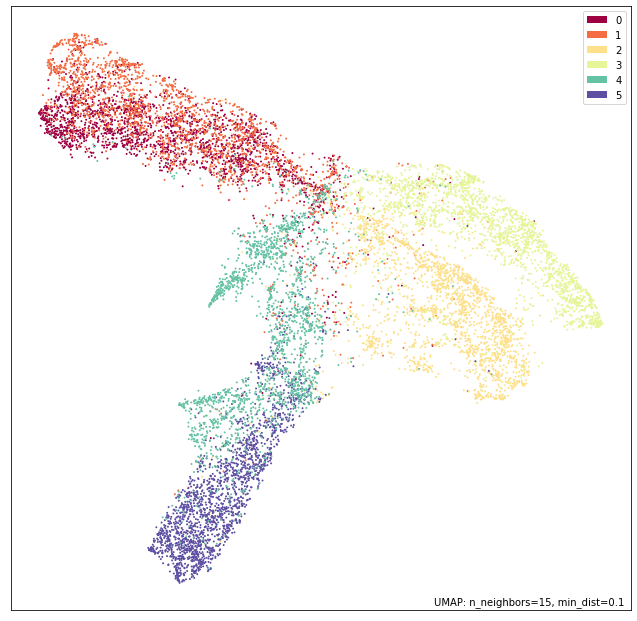

In [7]:
# custom 0
plt.figure(figsize=(20,14))
import umap
import umap.plot

mapper = umap.UMAP(random_state=seed).fit(features)
umap.plot.points(mapper, labels=np.array(y_test))
# plt.savefig(f'{TEMP_DATADIR}/umap_{splitting}_{cust}_{layer_name}.eps', format='eps', bbox_inches = 'tight', pad_inches = 0)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 1440x1008 with 0 Axes>

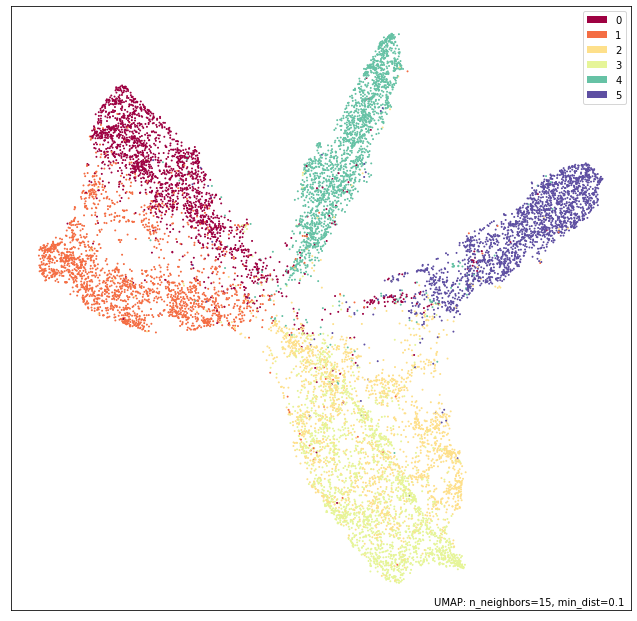

In [4]:
# random 
plt.figure(figsize=(20,14))
import umap
import umap.plot

mapper = umap.UMAP(random_state=seed).fit(features)
umap.plot.points(mapper, labels=np.array(y_test))
plt.savefig(f'{TEMP_DATADIR}/umap_{splitting}_{cust}_{layer_name}.eps', format='eps', bbox_inches = 'tight', pad_inches = 0)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 1440x1008 with 0 Axes>

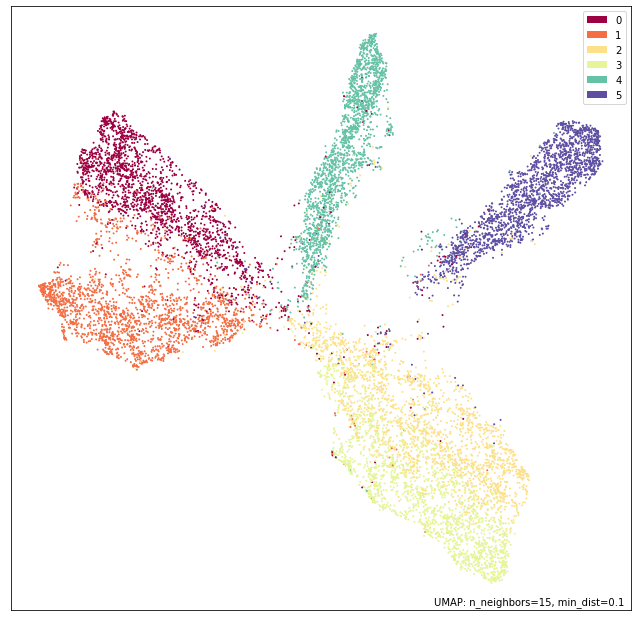

In [3]:
plt.figure(figsize=(20,14))
import umap
import umap.plot

mapper = umap.UMAP(random_state=seed).fit(features)
umap.plot.points(mapper, labels=np.array(y_test))
plt.savefig(f'{TEMP_DATADIR}/umap_{splitting}_{cust}_{layer_name}.eps', format='eps', bbox_inches = 'tight', pad_inches = 0)

In [4]:
get_labelencoder_mapping(le)

{'Ae. aegypti': 0,
 'Ae. albopictus': 1,
 'An. arabiensis': 2,
 'An. gambiae': 3,
 'C. pipiens': 4,
 'C. quinquefasciatus': 5}

In [8]:
def draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title='', data=features):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(data);
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], range(len(u)), c=y_test)
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], u[:,1], c=y_test)
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:,0], u[:,1], u[:,2], c=y_test, s=100)
    plt.title(title, fontsize=18)

/home/kalfasyan/anaconda3/envs/wbtf2/lib/python3.6/site-packages/umap/spectral.py:252: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  "WARNING: spectral initialisation failed! The eigenvector solver\n"
/home/kalfasyan/anaconda3/envs/wbtf2/lib/python3.6/site-packages/umap/spectral.py:252: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  "WARNING: spectral initialisation failed! The eigenvector solver\n"
/home/kalfasyan/anaconda3/envs/wbtf2/lib/python3.6/site-packages/umap/spectral.py:252: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise 

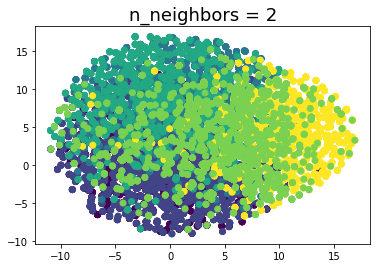

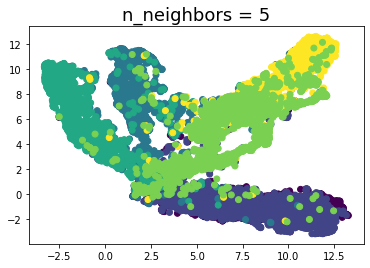

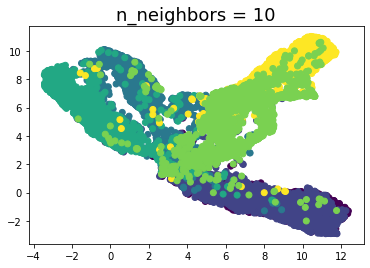

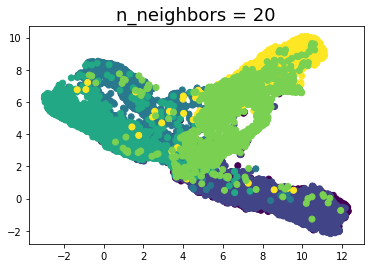

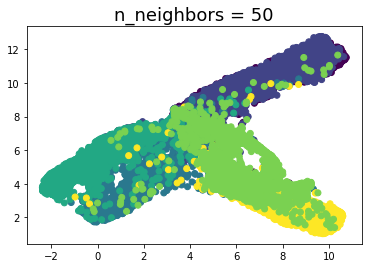

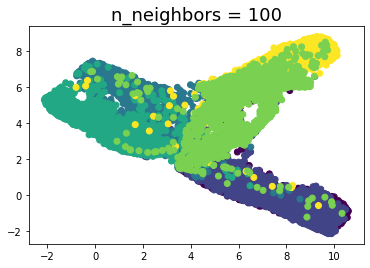

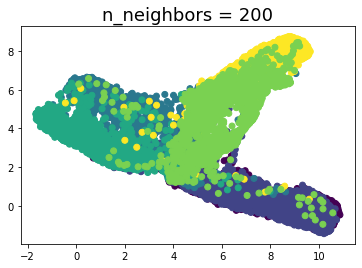

In [9]:
for n in (2, 5, 10, 20, 50, 100, 200):
    draw_umap(n_neighbors=n, title='n_neighbors = {}'.format(n))

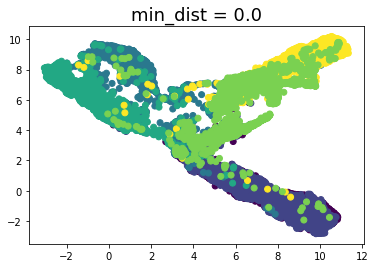

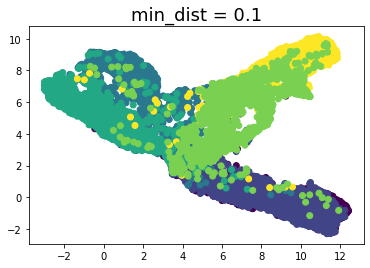

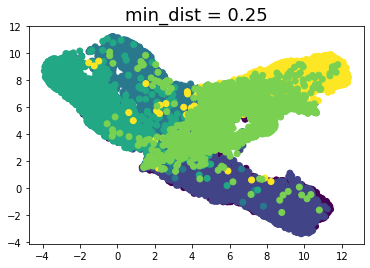

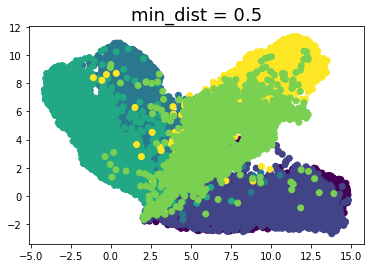

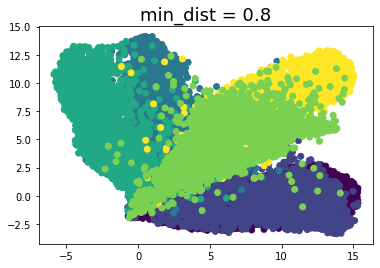

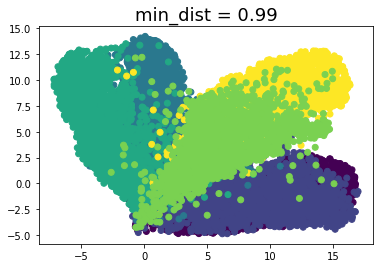

In [10]:
for d in (0.0, 0.1, 0.25, 0.5, 0.8, 0.99):
    draw_umap(min_dist=d, title='min_dist = {}'.format(d))

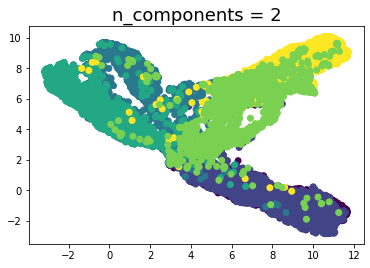

In [12]:
draw_umap(n_components=2, title='n_components = 2')

/home/kalfasyan/anaconda3/envs/wbtf2/lib/python3.6/site-packages/umap/plot.py:848: UserWarning: Hammer edge bundling is expensive for large graphs!
This may take a long time to compute!
  "Hammer edge bundling is expensive for large graphs!\n"
/home/kalfasyan/anaconda3/envs/wbtf2/lib/python3.6/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


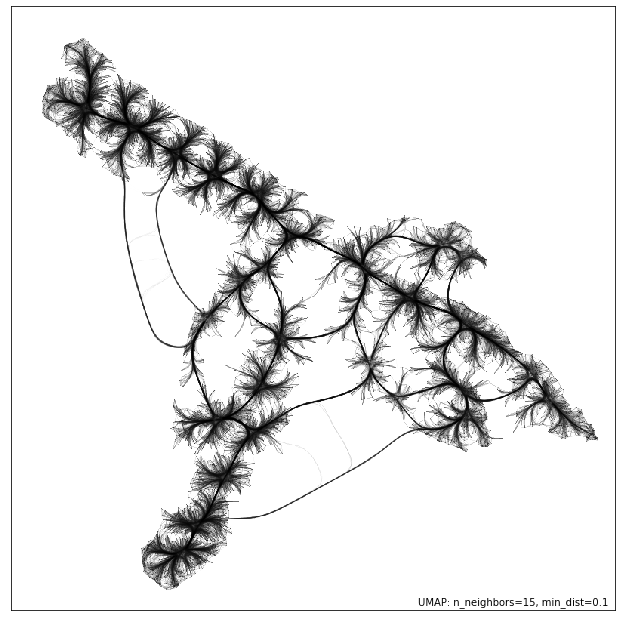

In [27]:
umap.plot.connectivity(mapper, edge_bundling='hammer')


Learning rate: 10
Perplexity: 50
Init: pca
Steps: 1000



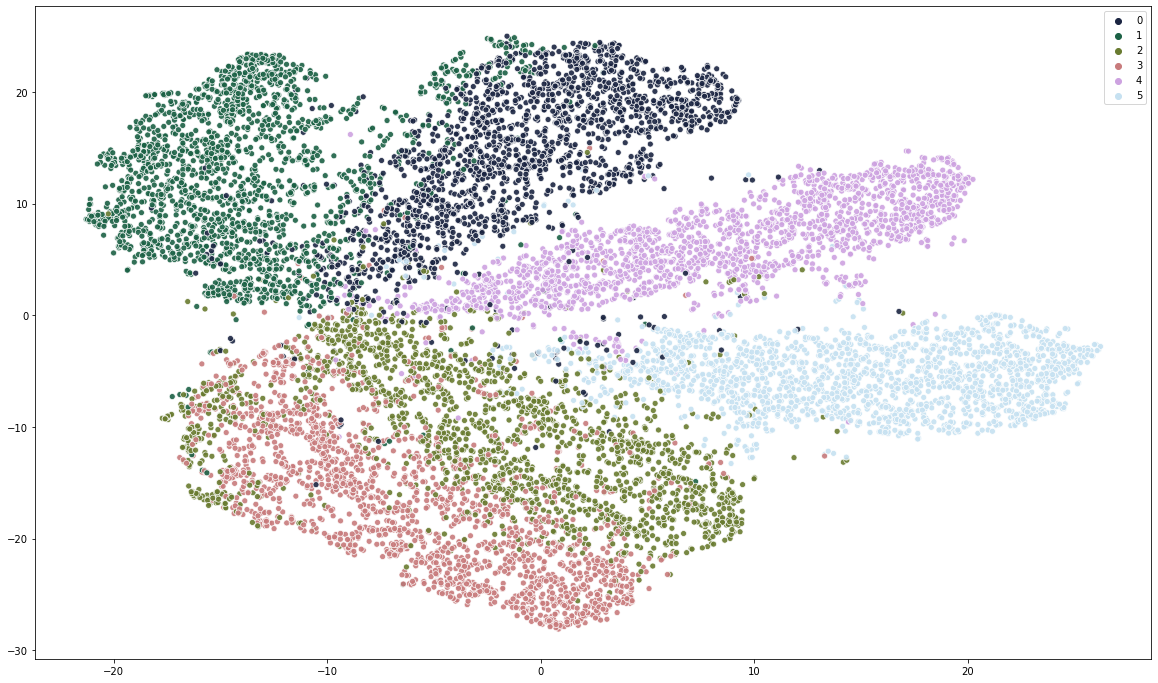

In [16]:

# sns.set_style("white")

params = {"learning_rate": [10],#,100,200],#,500,1000],
          "perplexity": [50],#[20,30,50,100,150],
          "init": ['pca'], #,'random'],
          "steps": [1000]}#, 5000]}  

for lr in params["learning_rate"]:
    for px in params["perplexity"]:
        for ini in params["init"]:
            for st in params["steps"]:
                fname = f'/home/kalfasyan/projects/wingbeat_frequencies/temp_data/logs/{splitting}_{data_setting}_{model_setting}{cust}_{layer_name}_init{ini}_lr{lr}_px{px}_steps{st}.png'
                print(f'Learning rate: {lr}\nPerplexity: {px}\nInit: {ini}\nSteps: {st}\n')
                if not os.path.isfile(fname): # NOT was here
                    tSNE = TSNE(learning_rate=lr, 
                                perplexity=px, 
                                init=ini, 
                                random_state=0, 
                                n_iter=st, 
                                n_jobs=-1)
                    X_final = tSNE.fit_transform(features)

                    plt.figure(figsize=(20,12))
                    sns.scatterplot(X_final[:,0], X_final[:,1],alpha=0.9, legend='full', 
                                    hue=y_test,
                                    palette=sns.color_palette("cubehelix", 6))
                
#                     plt.savefig(fname, format='png', bbox_inches = 'tight', pad_inches = 0)
#                     plt.close()

In [24]:
get_labelencoder_mapping(le)

{'Ae. aegypti': 0,
 'Ae. albopictus': 1,
 'An. arabiensis': 2,
 'An. gambiae': 3,
 'C. pipiens': 4,
 'C. quinquefasciatus': 5}

In [11]:
sx = pd.Series(X_final[:,0])
x_axis = sx[sx.apply(lambda x: 0 < x < 5)].index.values
sy = pd.Series(X_final[:,1])
y_axis = sy[sy.apply(lambda x: x < -31)].index.values
inds = np.intersect1d(x_axis, y_axis)
res = pd.Series(X_test).loc[inds].apply(lambda x: x.split('/')[-1])
# res.value_counts()
res.apply(lambda x: get_wingbeat_timestamp(x)).sort_values().head(50)


Series([], dtype: object)

In [17]:
X_final[:,0] > -5

array([False, False,  True, ..., False,  True,  True])

In [9]:
fname = f'/home/kalfasyan/projects/wingbeat_frequencies/temp_data/logs/{splitting}_{data_setting}_{model_setting}{cust}_{layer_name}'

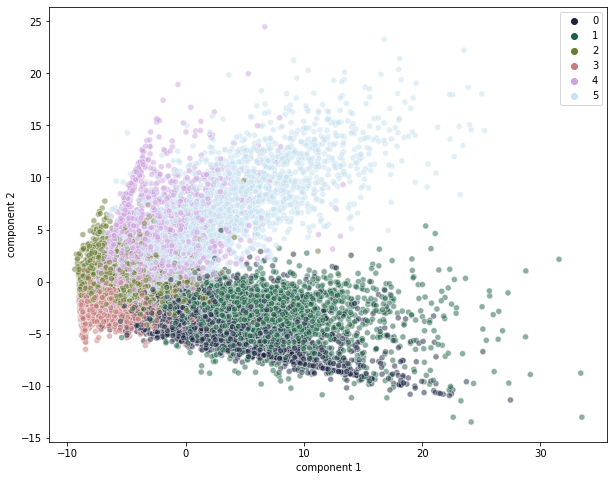

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_std = StandardScaler(with_std=False).fit_transform(features)  # standardization of data

pca = PCA(n_components=2)

X_final = pca.fit_transform(X_std)

plt.figure(figsize=(10,8))
sns.scatterplot(X_final[:,0], X_final[:,1],
                alpha=0.5, 
                legend='full', 
                hue=y_test, 
                palette=sns.color_palette("cubehelix", 6)) 
plt.xlabel('component 1')
plt.ylabel('component 2')
pcaname = f'{fname[:-4]}_pca.png'
plt.savefig(pcaname, format='png', bbox_inches = 'tight', pad_inches = 0)
plt.show()

plt.close()

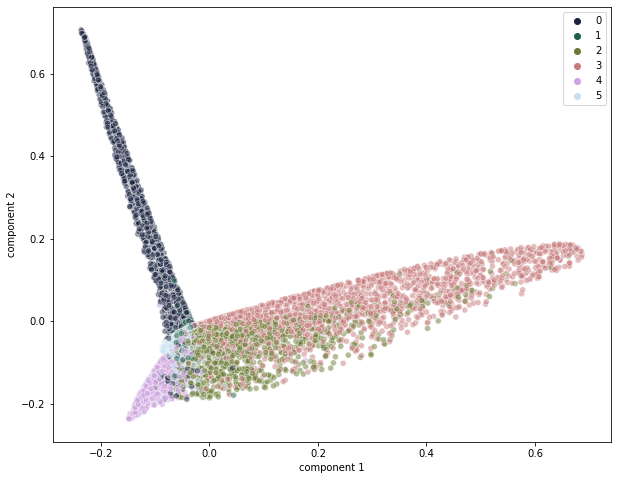

In [15]:
from sklearn.decomposition import KernelPCA

X_std = StandardScaler(with_std=False).fit_transform(features)  # standardization of data

rbf_pca = KernelPCA(n_components=6, kernel="rbf")

X_final = rbf_pca.fit_transform(X_std)

plt.figure(figsize=(10,8))
sns.scatterplot(X_final[:,0], X_final[:,1],alpha=0.5, legend='full', 
                hue=y_test,
                palette=sns.color_palette("cubehelix", 6)) 
plt.xlabel('component 1')
plt.ylabel('component 2')

kpcaname = f'{fname[:-4]}_kpca.png'
plt.savefig(kpcaname, format='png')
plt.show()

plt.close()

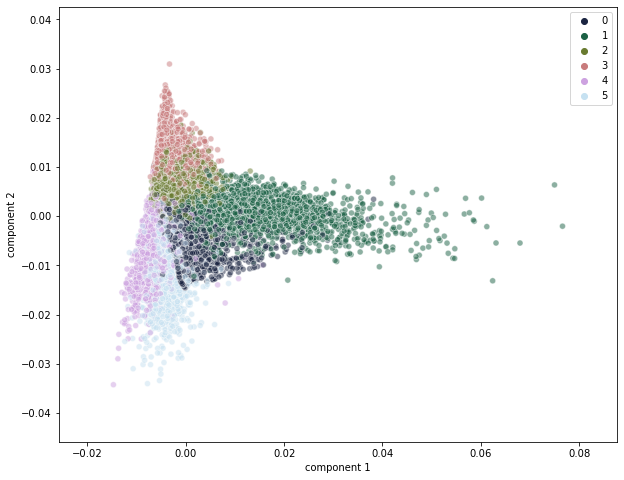

In [14]:
from sklearn.manifold import LocallyLinearEmbedding

X_std = StandardScaler(with_std=False).fit_transform(features)  # standardization of data

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=13)
X_final = lle.fit_transform(X_std)

plt.figure(figsize=(10,8))
sns.scatterplot(X_final[:,0], X_final[:,1],alpha=0.5, legend='full', 
                hue=y_test,
                palette=sns.color_palette("cubehelix", 6)) 
plt.xlabel('component 1')
plt.ylabel('component 2')

llename = f'{fname[:-4]}_lle.png'
plt.savefig(llename, format='png', bbox_inches = 'tight', pad_inches = 0)
plt.show()

plt.close()

In [13]:
X_final.shape

(12000, 2)